In [242]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
# 사용할 데이터셋 불러오고 출력하기
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [244]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [245]:
# 의미 없는 CustomerID 열 제거, 성별은 관계 없으므로 원-핫 인코딩 진행
df = df.drop('CustomerID', axis = 1)
df = pd.get_dummies(df, 'Gender')

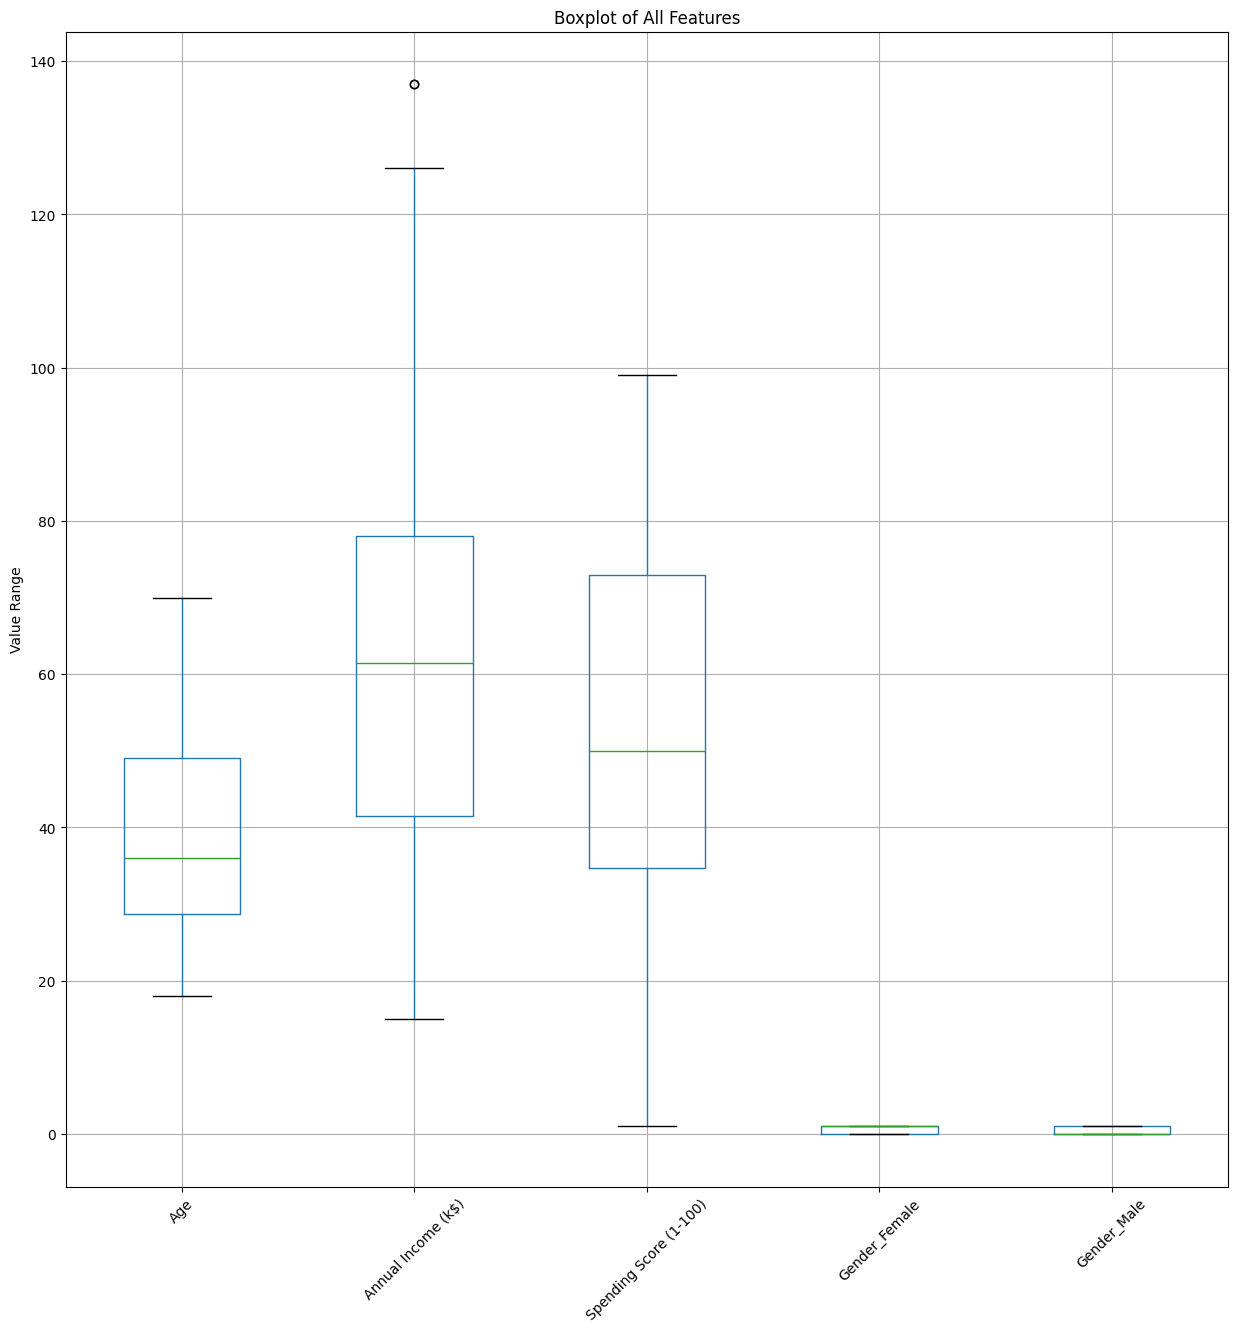

In [246]:
# 데이터를 시각화하여 이상치 확인
plt.figure(figsize=(15, 15))
df.boxplot()
plt.title("Boxplot of All Features")
plt.ylabel("Value Range")
plt.xticks(rotation=45)
plt.show()

In [247]:
# Annual Income의 이상치 제거
Q1_Annual_Income = df['Annual Income (k$)'].quantile(0.25)
Q3_Annual_Income = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3_Annual_Income - Q1_Annual_Income
upper_bound =  Q3_Annual_Income + 1.5 * IQR
df = df[df['Annual Income (k$)'] <= upper_bound]
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False
...,...,...,...,...,...
193,38,113,91,True,False
194,47,120,16,True,False
195,35,120,79,True,False
196,45,126,28,True,False


In [248]:
# 데이터의 통계량 확인
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000,198.000000
mean,38.929293,59.787879,50.196970
std,14.016852,25.237259,25.746846
min,18.000000,15.000000,1.000000
25%,28.250000,40.500000,35.000000
50%,36.000000,61.000000,50.000000
75%,49.000000,77.750000,72.750000
max,70.000000,126.000000,99.000000


In [249]:
# 데이터 Min-Max 정규화
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# KMeans

In [250]:
# KMeans 불러오기
from sklearn.cluster import KMeans

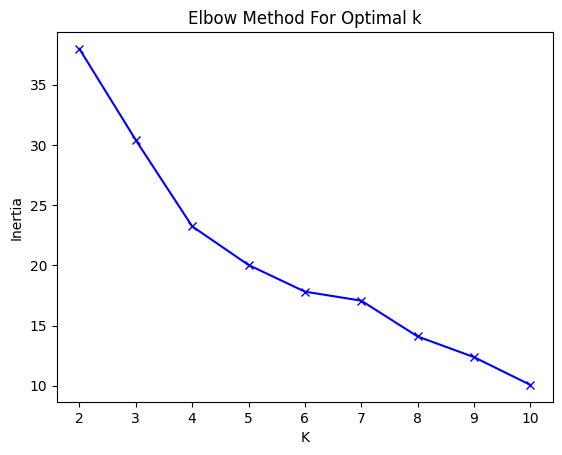

In [251]:
# elbow method를 사용해서 최적의 군집 개수 찾기
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters= k, random_state= 42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(K, inertia, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [252]:
# 각 군집 개수 별 실루엣 점수도 확인
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"k = {k}, 실루엣 점수: {silhouette_avg}")

k = 2, 실루엣 점수: 0.6295593145524113
k = 3, 실루엣 점수: 0.5213951882370287
k = 4, 실루엣 점수: 0.35383297146888476
k = 5, 실루엣 점수: 0.3627667087982219
k = 6, 실루엣 점수: 0.3724322962989111
k = 7, 실루엣 점수: 0.3699176168140953
k = 8, 실루엣 점수: 0.3808027254161957
k = 9, 실루엣 점수: 0.384356878776587
k = 10, 실루엣 점수: 0.4170789046678497


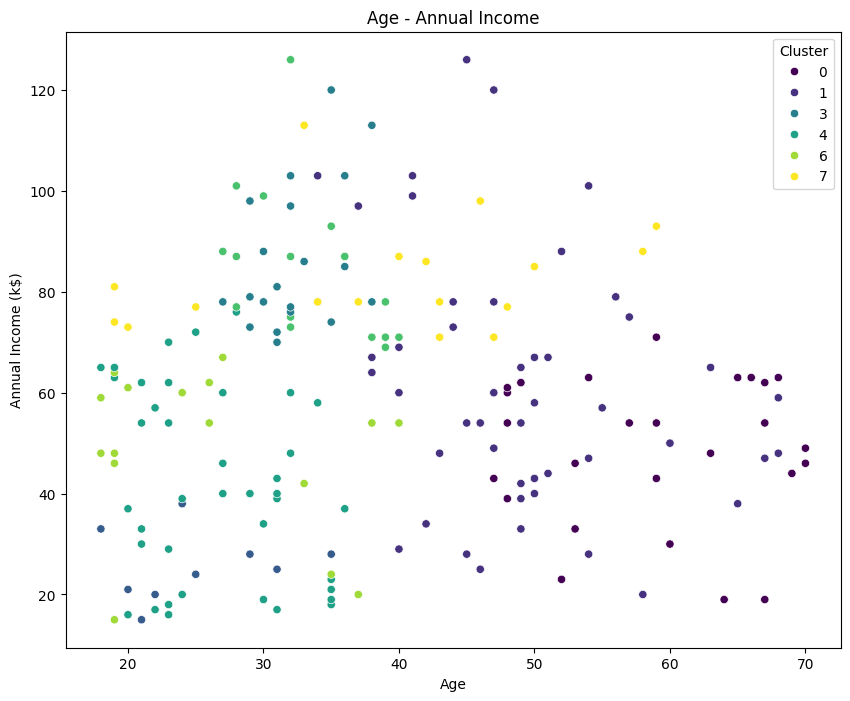

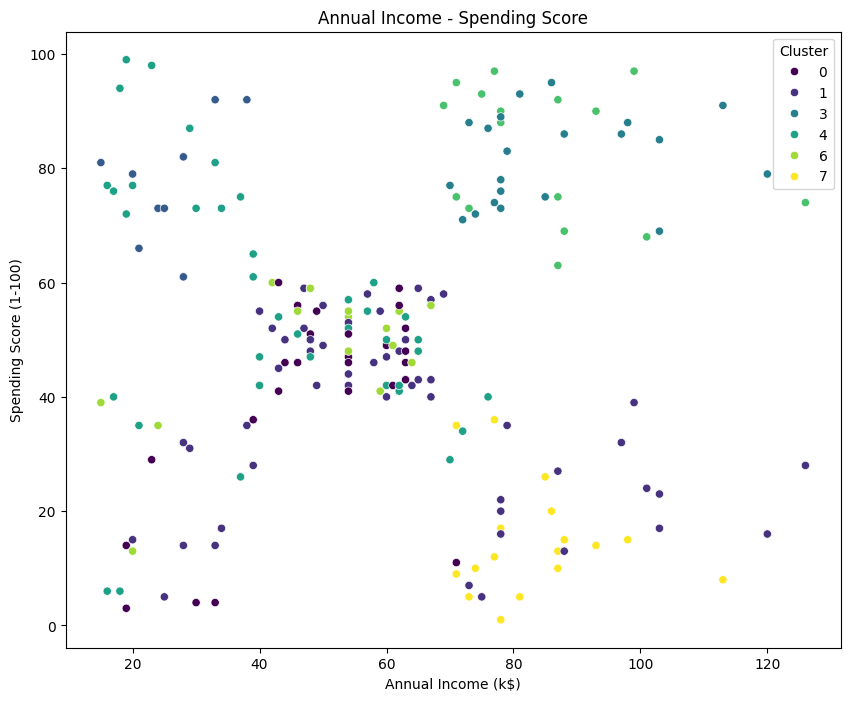

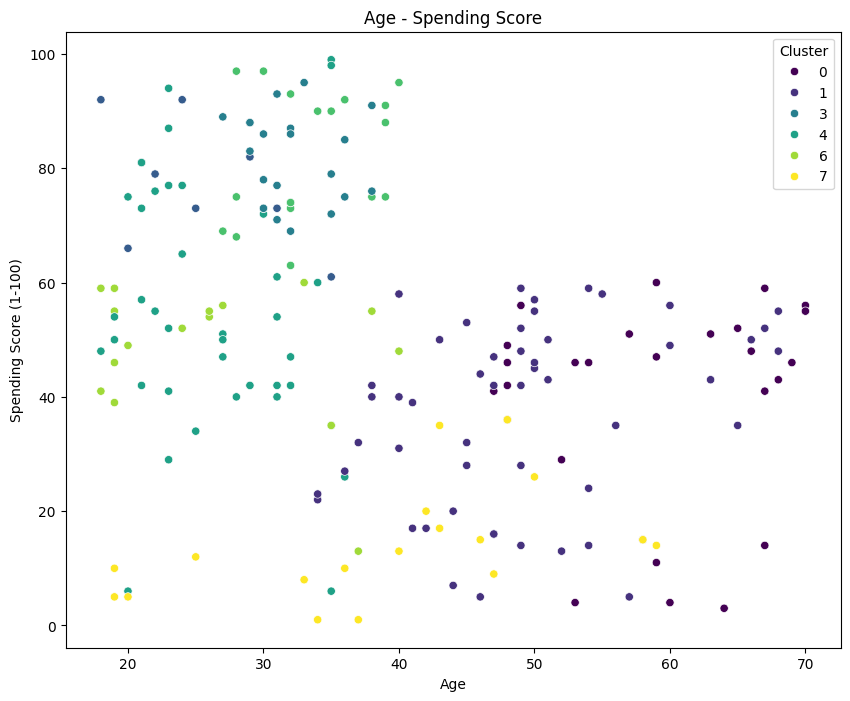

In [253]:
# elbow method를 통해 얻은 최적의 군집 개수로 데이터 시각화
kmeans = KMeans(n_clusters=8, random_state= 42)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

plt.figure(figsize = (10, 8))
sns.scatterplot(x = df['Age'], y = df['Annual Income (k$)'], hue=df['Cluster'], palette= 'viridis')
plt.title('Age - Annual Income')
plt.show()

plt.figure(figsize = (10, 8))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue=df['Cluster'], palette= 'viridis')
plt.title('Annual Income - Spending Score')
plt.show()

plt.figure(figsize = (10, 8))
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'], hue=df['Cluster'], palette= 'viridis')
plt.title('Age - Spending Score')
plt.show()

# 계층적 군집화

In [254]:
# 계층적 군집화
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

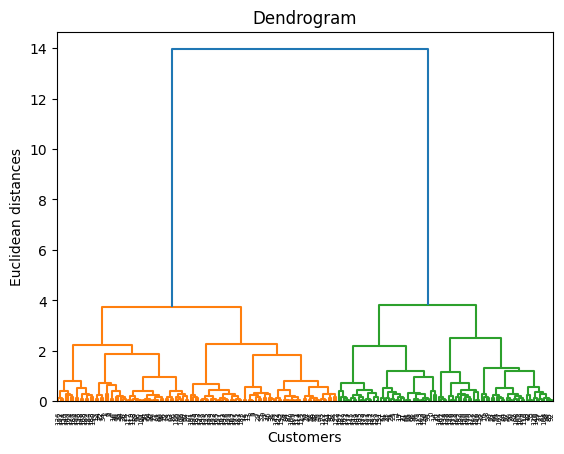

In [255]:
# 덴드로그램 출력
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

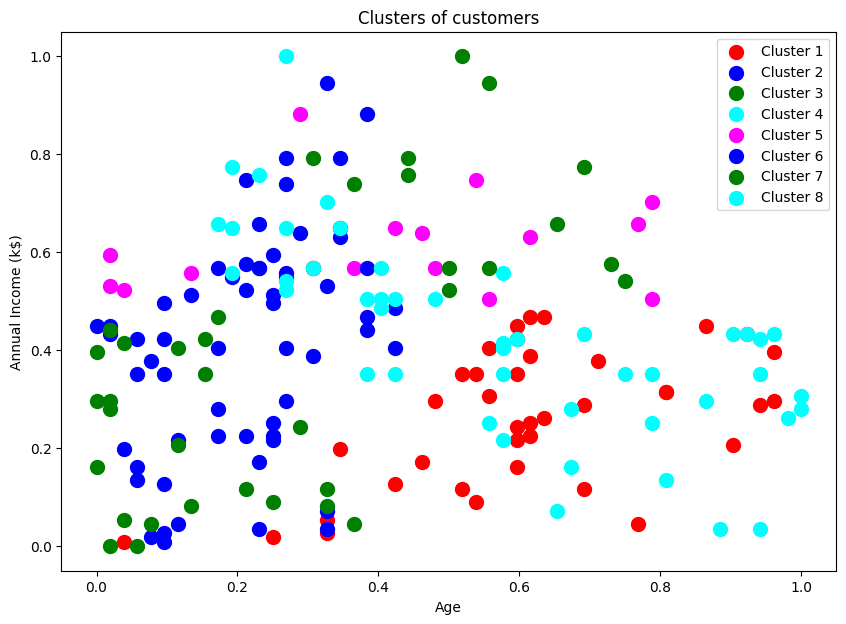

In [256]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')

# 모델 학습 및 예측
y_hc = hc.fit_predict(df_scaled)

# 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled[y_hc == 0, 0], df_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_scaled[y_hc == 1, 0], df_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_scaled[y_hc == 2, 0], df_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df_scaled[y_hc == 3, 0], df_scaled[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(df_scaled[y_hc == 4, 0], df_scaled[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(df_scaled[y_hc == 5, 0], df_scaled[y_hc == 5, 1], s=100, c='blue', label='Cluster 6')
plt.scatter(df_scaled[y_hc == 6, 0], df_scaled[y_hc == 6, 1], s=100, c='green', label='Cluster 7')
plt.scatter(df_scaled[y_hc == 7, 0], df_scaled[y_hc == 7, 1], s=100, c='cyan', label='Cluster 8')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [257]:
# 실루엣 점수 계산
silhouette_avg = silhouette_score(df_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.387259938002532


# DBSCAN

In [258]:
from sklearn.cluster import DBSCAN
import numpy as np

In [259]:
# DBSCAN의 하이퍼파라미터 튜닝(epsilon, min_samples_values)
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(3, 8)
best_score = 0
best_params = None
for epsilon in eps_values:
    for min_sample in min_samples_values:
        dbscan = DBSCAN(eps = epsilon, min_samples= min_sample)
        labels = dbscan.fit_predict(df_scaled)
        # label이 -1이면 노이즈이므로 제거
        if len(set(labels)) > 1 and -1 not in set(labels):
            score = silhouette_score(df_scaled, labels)
            # 실루엣 점수가 가장 높을 때 기록
            if score > best_score:
                best_score = score
                best_params = {'eps': epsilon, 'min_samples': min_sample}

In [260]:
print(best_score)
print(best_params)

0.6295593145524113
{'eps': np.float64(0.30000000000000004), 'min_samples': 3}


In [ ]:
# 최적의 하이퍼파라미터를 이용하여 모델 생성
dbscan = DBSCAN(eps = 0.3, min_samples= 3)
df['Cluster'] = dbscan.fit_predict(df_scaled)

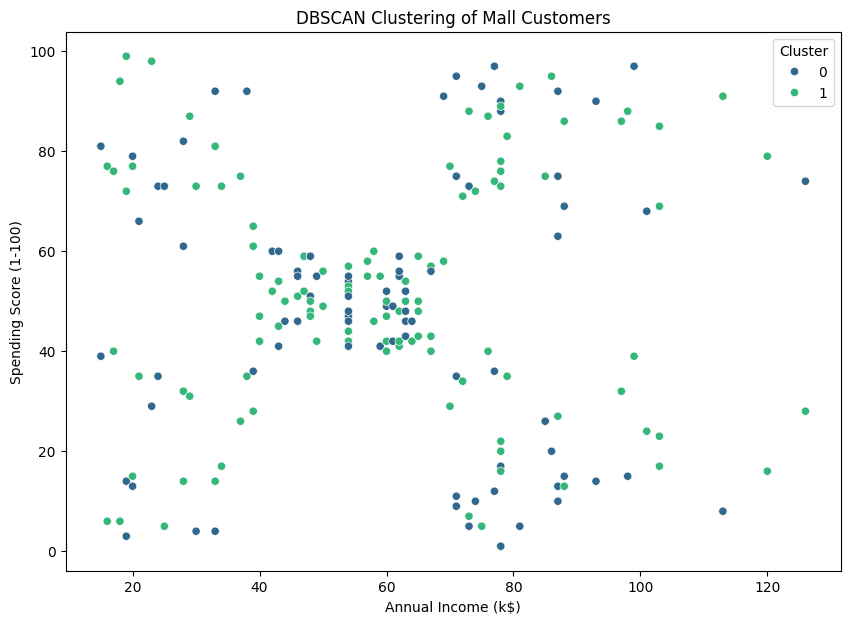

In [262]:
# 데이터 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

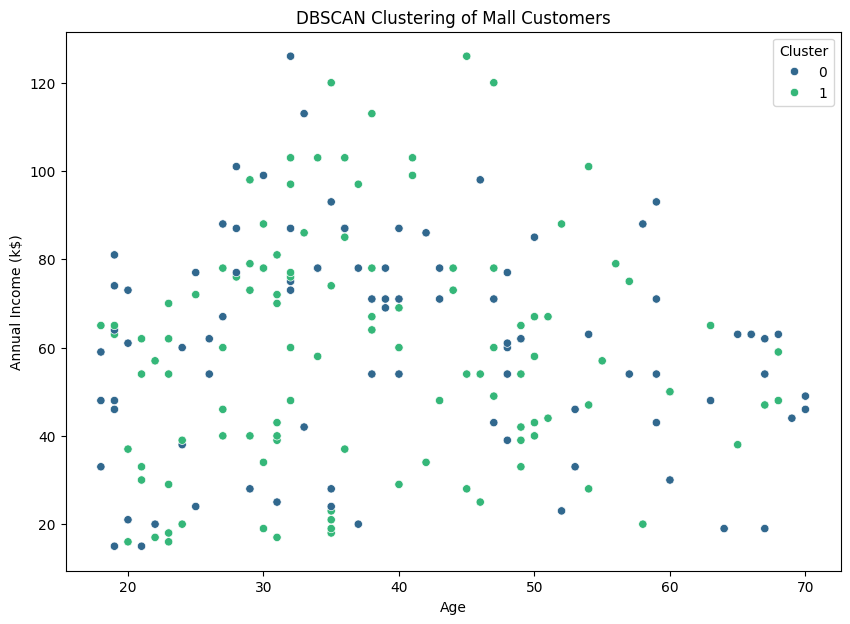

In [263]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

# 2번 - 도전과제

## GaussianMixture

In [264]:
from sklearn.mixture import GaussianMixture

In [265]:
# GaussianMixture의 하이퍼파라미터 튜닝
best_component = 0
best_score = 0
for component in range(4, 9):
        gm = GaussianMixture(n_components= component, random_state= 42)
        labels = gm.fit_predict(df_scaled)
        if len(set(labels)) > 1 and -1 not in set(labels):  # Noise 제외
            score = silhouette_score(df_scaled, labels)
            if score > best_score:
                best_score = score
                best_component = component
print(best_score)
print(best_component)

0.3666129811150276
6


In [266]:
# 모델 학습
gm = GaussianMixture(n_components= 6, random_state= 42)
df['Cluster'] = gm.fit_predict(df_scaled)

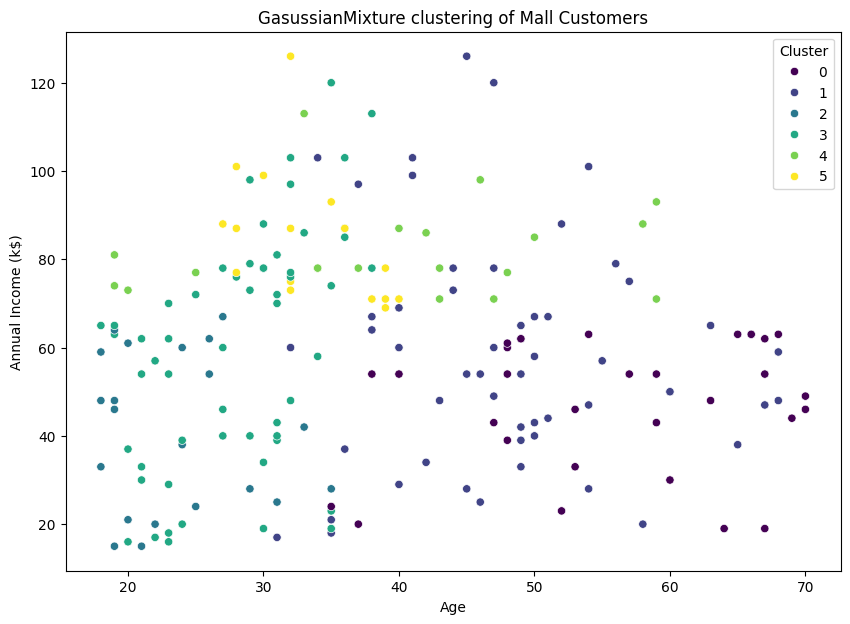

In [267]:
# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis')
plt.title('GasussianMixture clustering of Mall Customers')
plt.show()

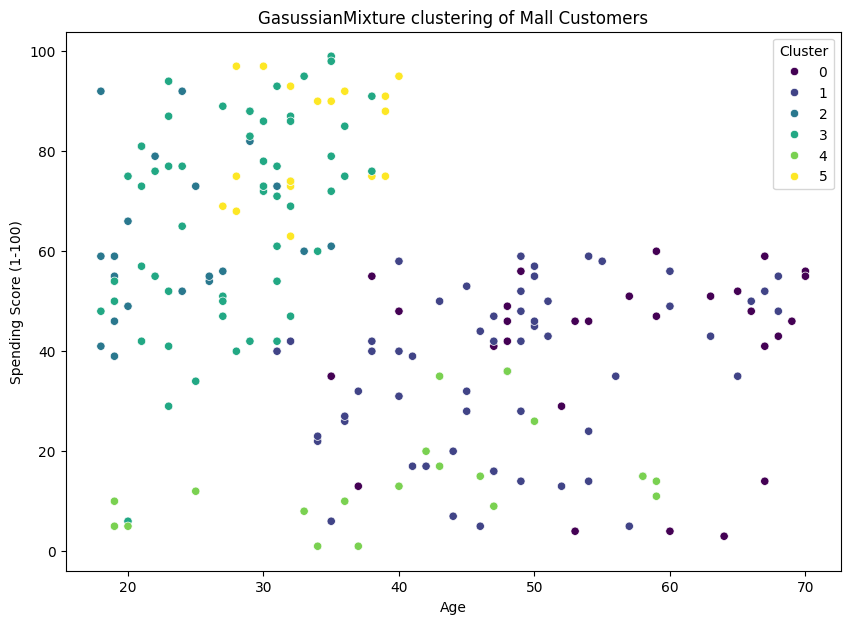

In [268]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('GasussianMixture clustering of Mall Customers')
plt.show()

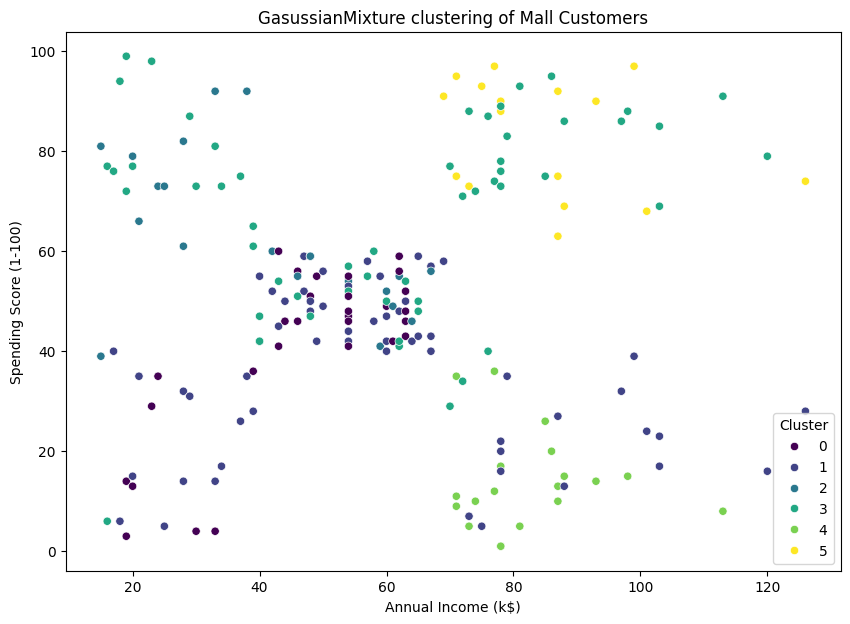

In [269]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('GasussianMixture clustering of Mall Customers')
plt.show()

## SpectralClustering

In [270]:
from sklearn.cluster import SpectralClustering

In [271]:
# SpectralClustering의 하이퍼파라미터 튜닝
best_cluster = 0
best_score = 0
for k in range(3, 10):
    spectral = SpectralClustering(n_clusters=k, affinity='rbf', random_state=42)
    labels = spectral.fit_predict(df_scaled)
    if len(set(labels)) > 1 and -1 not in set(labels):  # Noise 제외
            score = silhouette_score(df_scaled, labels)
            if score > best_score:
                best_score = score
                best_cluster = k
print(best_score)
print(best_component)

0.5213951882370287
6


In [272]:
spectral = SpectralClustering(n_clusters=6, affinity='rbf', random_state=42)
df['Cluster'] = spectral.fit_predict(df_scaled)

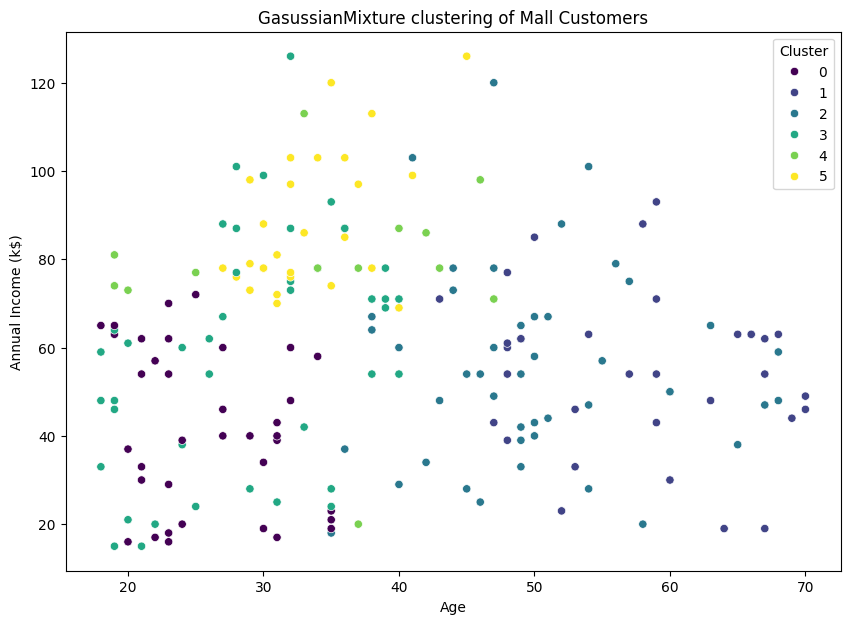

In [273]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis')
plt.title('GasussianMixture clustering of Mall Customers')
plt.show()

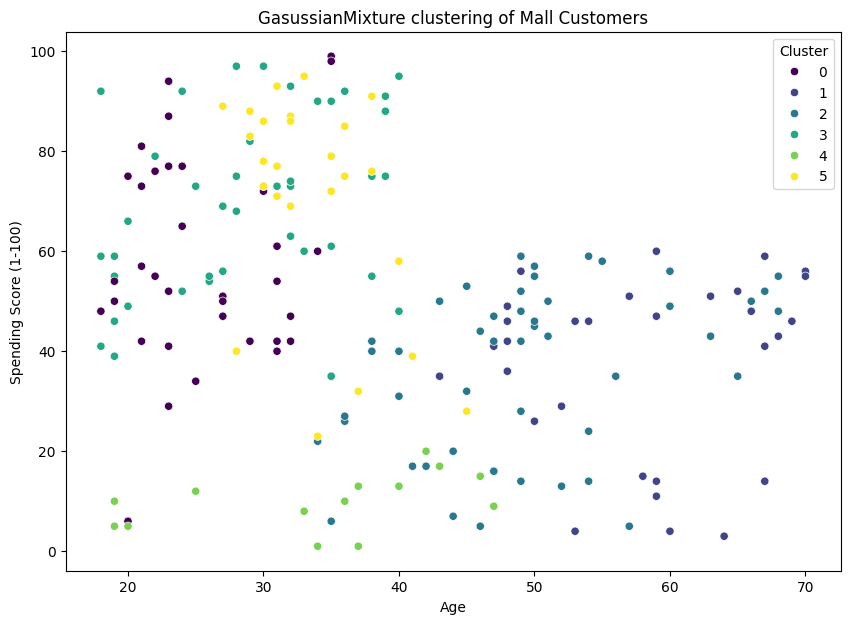

In [274]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('GasussianMixture clustering of Mall Customers')
plt.show()

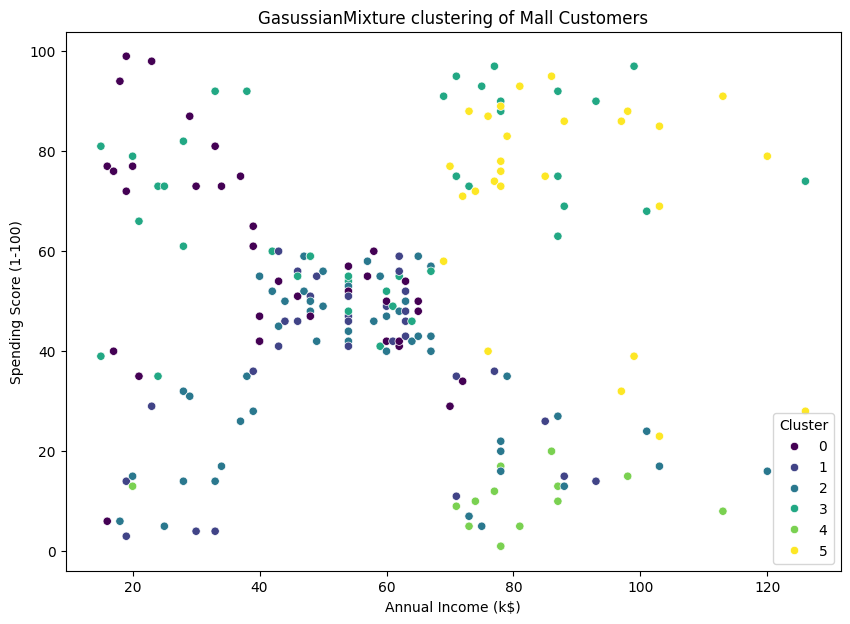

In [275]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('GasussianMixture clustering of Mall Customers')
plt.show()

# 고객 분류 모델 만들기

### 나이, 수입, 소비 점수를 기준으로 4개의 클러스터로 군집화 실행 후, 군집 번호를 타겟으로 한 분류 모델 생성
### 후에 새로운 데이터가 들어왔을 경우, 어느 클러스터에 속할지 예측

In [276]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [277]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
# 군집화 할 열만 따로 사용하기
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# kmeans를 이용하여 4개의 군집으로 군집화 실행
kmeans = KMeans(n_clusters = 4, random_state = 42)
clusters = kmeans.fit_predict(data_scaled)
# 군집 번호를 새로운 열에 저장(나중에 타겟으로 사용됨)
df['Cluster'] = clusters

In [ ]:
# 데이터 전처리
df = pd.get_dummies(df, 'Gender').drop('CustomerID', axis = 1)
df

,Age,Annual Income (k$),Spending Score (1-100),Cluster,Gender_Female,Gender_Male
0,19,15,39,2,False,True
1,21,15,81,2,False,True
2,20,16,6,2,True,False
3,23,16,77,2,True,False
4,31,17,40,2,True,False
...,...,...,...,...,...,...
195,35,120,79,1,True,False
196,45,126,28,3,True,False
197,32,126,74,1,False,True
198,32,137,18,3,False,True


In [ ]:
# Cluster 번호를 타겟으로 하는 모델 생성
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']]
y = df['Cluster']

In [ ]:
# 데이터 분할 및 스케일링(분류모델이므로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [284]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 의사결정나무로 분류하기

In [285]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [286]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.95


## 랜덤 포레스트로 분류하기

In [287]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [288]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.975
